## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #matplotlib
import seaborn as sns 
from sklearn import metrics
from numpy.linalg import eig

## Import iris Dataset

In [2]:
csvfile = pd.read_csv("iris.data",header = None)  
df = csvfile.rename(columns = {0:'sepal_length' ,1:'sepal_width',2:'petal_length',3:'petal_width',4:'species'})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Visualize the Dataset

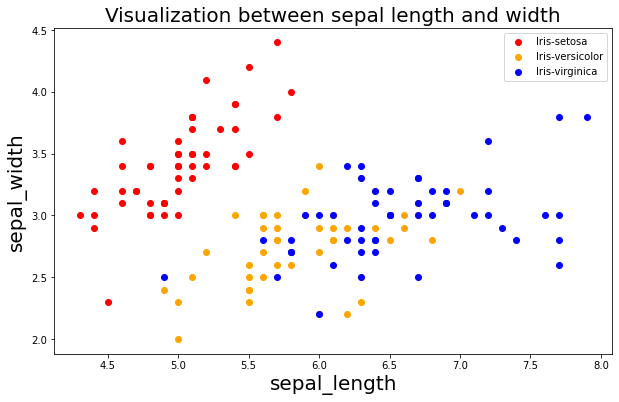

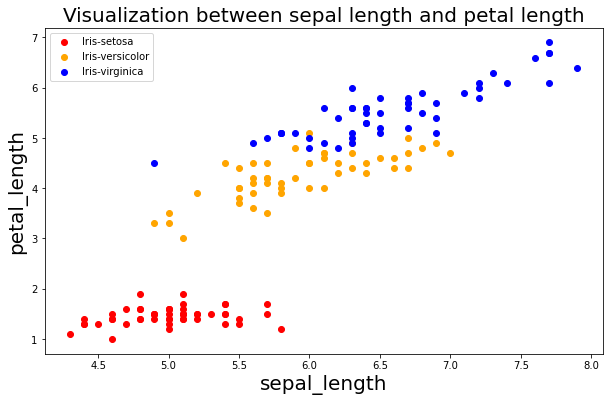

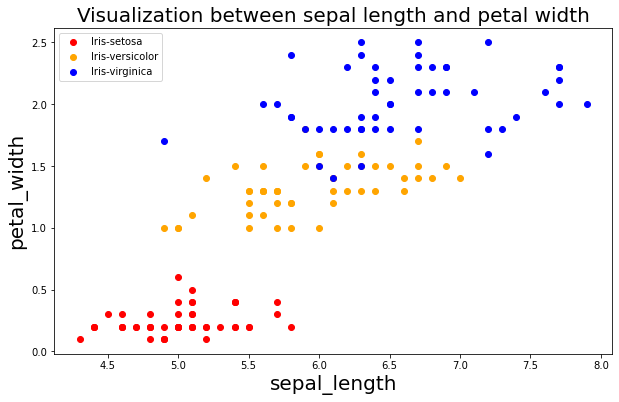

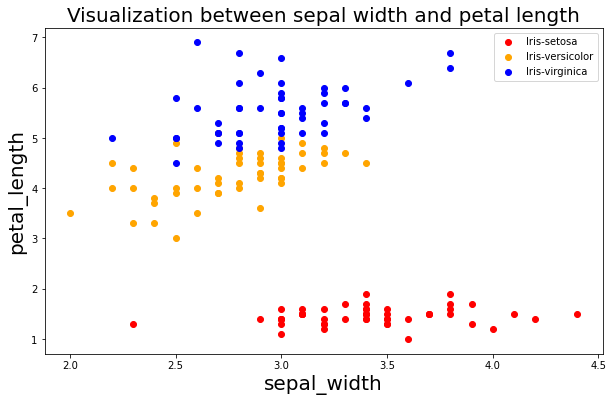

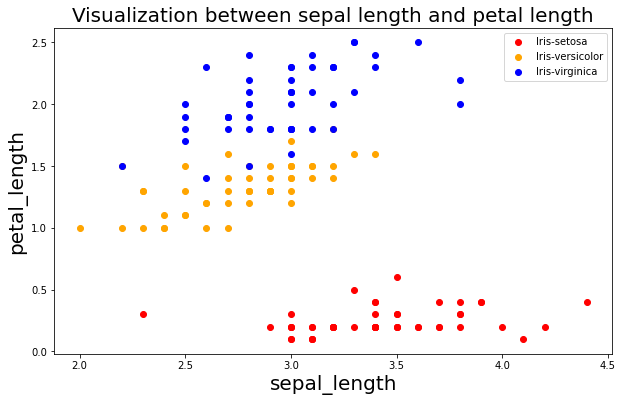

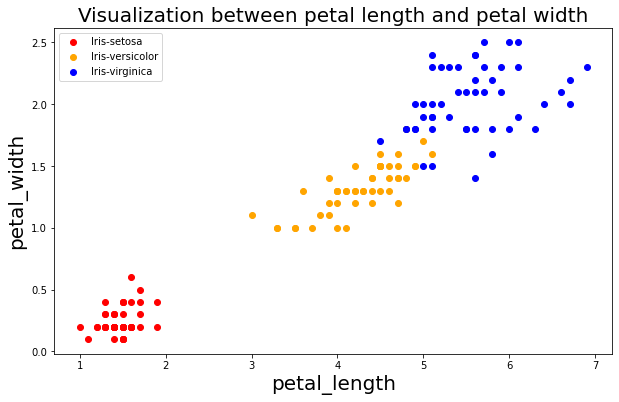

In [3]:
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

# plot 1 for sepal length and sepal width
fig = plt.figure(figsize=(10,6))
fig.set_facecolor("white") 
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal_length",fontsize=20)
plt.ylabel("sepal_width",fontsize=20)
plt.title("Visualization between sepal length and width",fontsize=20)
plt.legend()
plt.show()

# plot 2 for sepal length and petal length
fig = plt.figure(figsize=(10,6))
fig.set_facecolor("white") 
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("sepal_length",fontsize=20)
plt.ylabel("petal_length",fontsize=20)
plt.title("Visualization between sepal length and petal length",fontsize=20)
plt.legend()
plt.show()

# plot 3 for sepal length and petal width
fig = plt.figure(figsize=(10,6))
fig.set_facecolor("white") 
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal_length",fontsize=20)
plt.ylabel("petal_width",fontsize=20)
plt.title("Visualization between sepal length and petal width",fontsize=20)
plt.legend()
plt.show()

# plot 4 for sepal width and petal length
fig = plt.figure(figsize=(10,6))
fig.set_facecolor("white") 
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("sepal_width",fontsize=20)
plt.ylabel("petal_length",fontsize=20)
plt.title("Visualization between sepal width and petal length",fontsize=20)
plt.legend()
plt.show()

# plot 5 for sepal width and petal width
fig = plt.figure(figsize=(10,6))
fig.set_facecolor("white") 
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal_length",fontsize=20)
plt.ylabel("petal_length",fontsize=20)
plt.title("Visualization between sepal length and petal length",fontsize=20)
plt.legend()
plt.show()

# plot 6 for petal length and petal width
fig = plt.figure(figsize=(10,6))
fig.set_facecolor("white") 
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("petal_length",fontsize=20)
plt.ylabel("petal_width",fontsize=20)
plt.title("Visualization between petal length and petal width",fontsize=20)
plt.legend()
plt.show()

## Normalize the Dataset

In [4]:
feature1 = df['sepal_length']
feature2 = df['sepal_width']
feature3 = df['petal_length']
feature4 = df['petal_width']
a1 = max(feature1)
a2 = min(feature1)
b1 = max(feature2)
b2 = min(feature2)
c1 = max(feature3)
c2 = min(feature3)
d1 = max(feature4)
d2 = min(feature4)
df['sepal_length'] = (feature1-a2)/(a1-a2)
df['sepal_width']= (feature2-b2)/(b1-b2)
df['petal_length'] = (feature3-c2)/(c1-c2)
df['petal_width'] = (feature4-d2)/(d1-d2)
print("Normalized dataset are : \n ",df)

Normalized dataset are : 
       sepal_length  sepal_width  petal_length  petal_width         species
0        0.222222     0.625000      0.067797     0.041667     Iris-setosa
1        0.166667     0.416667      0.067797     0.041667     Iris-setosa
2        0.111111     0.500000      0.050847     0.041667     Iris-setosa
3        0.083333     0.458333      0.084746     0.041667     Iris-setosa
4        0.194444     0.666667      0.067797     0.041667     Iris-setosa
..            ...          ...           ...          ...             ...
145      0.666667     0.416667      0.711864     0.916667  Iris-virginica
146      0.555556     0.208333      0.677966     0.750000  Iris-virginica
147      0.611111     0.416667      0.711864     0.791667  Iris-virginica
148      0.527778     0.583333      0.745763     0.916667  Iris-virginica
149      0.444444     0.416667      0.694915     0.708333  Iris-virginica

[150 rows x 5 columns]


## Mean and Covariance Matrix

In [5]:
# dropping of species column for calculation purpose
df1 = df.drop(['species'], axis = 1) 

In [6]:
df2 = df1.to_numpy()   # convert dataframe to numpy array 
# Calculating mean across features
feature_mean = np.mean(df2, axis=0)   
feature1_mean = feature_mean[0] 
print("Mean of feature 1 is", feature1_mean)   
feature2_mean = feature_mean[1] 
print("Mean of feature 2 is", feature2_mean)   
feature3_mean = feature_mean[2] 
print("Mean of feature 3 is", feature3_mean) 
feature4_mean = feature_mean[3] 
print("Mean of feature 3 is", feature4_mean) 
#mean of all feature vector 
mean = feature_mean[0:4]
print("1*4 mean vector are : \n ",mean)

Mean of feature 1 is 0.42870370370370364
Mean of feature 2 is 0.43916666666666665
Mean of feature 3 is 0.4675706214689264
Mean of feature 3 is 0.45777777777777773
1*4 mean vector are : 
  [0.4287037  0.43916667 0.46757062 0.45777778]


In [7]:
# calculating covarience matrix
covMatrix = pd.DataFrame.cov(df1)
print ("covarience matrix for iris dataset are : \n ",covMatrix)

covarience matrix for iris dataset are : 
                sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.052908    -0.004545      0.059966     0.059827
sepal_width      -0.004545     0.032640     -0.022720    -0.020483
petal_length      0.059966    -0.022720      0.089433     0.091553
petal_width       0.059827    -0.020483      0.091553     0.101114


## Eigen Decomposition

In [8]:
cov = covMatrix.to_numpy()
values , vectors = eig(cov)
# the Eigen Values denote the variance among that direction
print("eigen values of a covarience matrix are : \n ",values)
#The Eigen Vectors denote the direction of spread
print("eigen vectors of a covarience matrix are : \n ",vectors)

eigen values of a covarience matrix are : 
  [0.23231168 0.03239279 0.00963728 0.00175337]
eigen vectors of a covarience matrix are : 
  [[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]


## Principal Components

In [9]:
eig_val = np.sort(values)[::-1][:2] # sorted values in decending order and taking starting 2 eigen value 
eig_fun = vectors[:,[0,1]]   # take corresponding eigen vector and then change them into row 
print("sort eig val : \n",eig_val)
P = np.matrix(eig_fun)  # convert array to 4*2 matrix
print("projection matrix : \n ",P)

sort eig val : 
 [0.23231168 0.03239279]
projection matrix : 
  [[ 0.4252893  -0.42100611]
 [-0.14612219 -0.90470509]
 [ 0.61610511  0.06432645]
 [ 0.64667752  0.01116485]]


## Projecting to New Feature Space

In [10]:
X = df1.to_numpy()   # converting dataframe to numpy array
Y = X.dot(P)   # doing matrix multiplication 
Princi_Y= pd.DataFrame(data = Y , columns = ['principal 1', 'principal 2'])
Y_new = pd.concat([Princi_Y,pd.DataFrame(df,columns = ['species'])], axis = 1)
print("new projected dataset are : \n ",Y_new)

new projected dataset are : 
       principal 1  principal 2         species
0       0.071897    -0.654171     Iris-setosa
1       0.078712    -0.442302     Iris-setosa
2       0.032466    -0.495395     Iris-setosa
3       0.047625    -0.443824     Iris-setosa
4       0.053995    -0.680173     Iris-setosa
..           ...          ...             ...
145     1.254013    -0.601605  Iris-virginica
146     1.108536    -0.370388  Iris-virginica
147     1.149551    -0.579611  Iris-virginica
148     1.191476    -0.691736  Iris-virginica
149     1.014337    -0.511464  Iris-virginica

[150 rows x 3 columns]


## Final Visualization

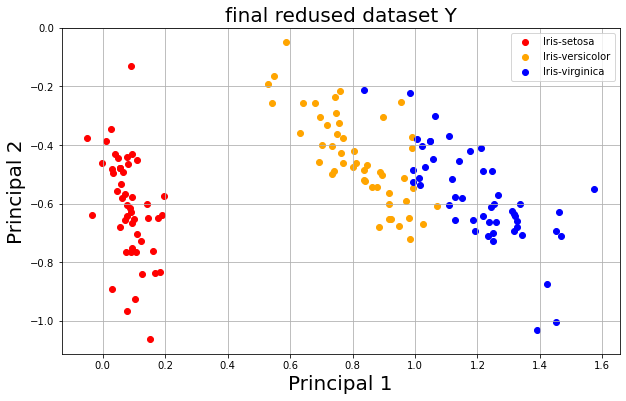

In [11]:
# visualization of principal component
fig = plt.figure(figsize=(10,6))
fig.set_facecolor("white") 
ax = fig.add_subplot(1,1,1) 
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x = Y_new[Y_new['species']==species[i]]
    ax.scatter(x['principal 1'],x['principal 2'],c=colors[i],label=species[i])    
ax.set_xlabel('Principal 1',fontsize=20)
ax.set_ylabel('Principal 2',fontsize=20)
ax.set_title('final redused dataset Y',fontsize=20)
ax.legend(species)  
ax.grid()    